Are Police shootings on the rise?
Which features are most correlated with police shootings?
Is there evidence of racism in the data?

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import datetime
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import seaborn as sns



%matplotlib inline

df = pd.read_csv('Documents/Police Shooting data.csv', encoding='latin-1' )
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [326]:
#First I want to explore the data
df.shape

(4453, 14)

In [327]:
#columns with missing data
NullColumns = set(df.columns[np.sum(df.isnull()) == 0])

In [328]:
NullColumns

{'body_camera',
 'city',
 'date',
 'id',
 'manner_of_death',
 'name',
 'signs_of_mental_illness',
 'state',
 'threat_level'}

In [329]:
np.sum(df.isnull())/df.shape[0]*100

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      5.569279
age                        3.772737
gender                     0.089827
race                       8.309005
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       3.974848
body_camera                0.000000
dtype: float64

In [330]:
#Adding year column to data based on date column
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015


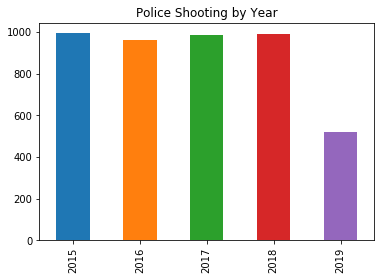

In [331]:
year_vals = df.year.value_counts().sort_index()

(year_vals).plot(kind="bar");
plt.title("Police Shooting by Year");

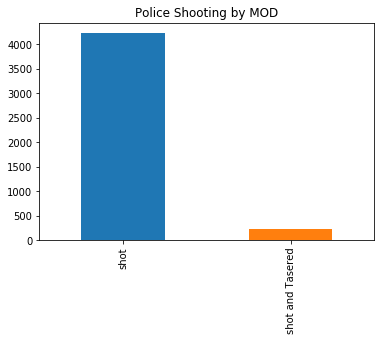

In [332]:
MOD_vals = df.manner_of_death.value_counts().sort_index()

(MOD_vals).plot(kind="bar");
plt.title("Police Shooting by MOD");

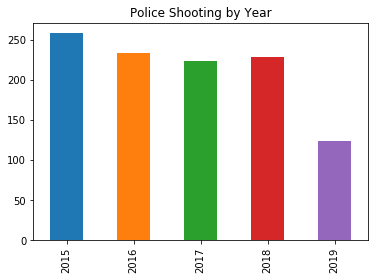

In [333]:
df_B= df.loc[df['race'] == "B"]

year_vals_B = df_B.year.value_counts().sort_index()

(year_vals_B).plot(kind="bar");
plt.title("Police Shooting by Year");

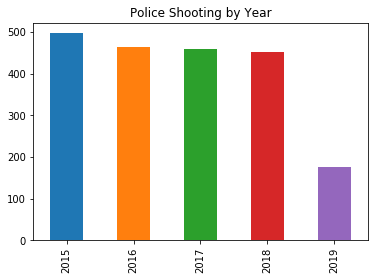

In [334]:
df_W= df.loc[df['race'] == "W"]

year_vals_W = df_W.year.value_counts().sort_index()

(year_vals_W).plot(kind="bar");
plt.title("Police Shooting by Year");

In [335]:
df2= df.dropna(subset=['race'], how='any')

In [336]:
df3= df2.dropna()

In [337]:
df4= df3.drop(['name','date','manner_of_death','city','id','state'],axis=1)

In [338]:
armed_df = df4.armed.unique()

In [339]:
armed_df

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', '

In [340]:
armed_df= armed_df[armed_df != "unarmed"]

In [341]:
armed_df

array(['gun', 'toy weapon', 'nail gun', 'knife', 'shovel', 'hammer',
       'hatchet', 'undetermined', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'pipe', 'bas

In [342]:
df4 = df4.replace(armed_df, "armed")

In [343]:
df4.head()

,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera,year
0,armed,53.0,M,A,True,attack,Not fleeing,False,2015
1,armed,47.0,M,W,False,attack,Not fleeing,False,2015
2,unarmed,23.0,M,H,False,other,Not fleeing,False,2015
3,armed,32.0,M,W,True,attack,Not fleeing,False,2015
4,armed,39.0,M,H,False,attack,Not fleeing,False,2015


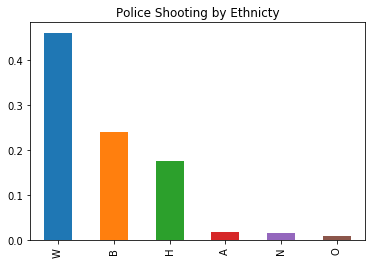

In [345]:
ethnicity_vals = df2.race.value_counts()

(ethnicity_vals/df.shape[0]).plot(kind="bar");
plt.title("Police Shooting by Ethnicty");

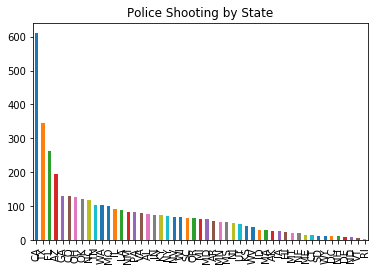

In [346]:
state_vals = df2.state.value_counts()

(state_vals).plot(kind="bar");
plt.title("Police Shooting by State");

In [347]:
Ethn_dict ={'w': .61, "B":.12, "H":.18, "A":.05, "N":.01, "O":.007}

In [348]:
#x, y = zip(*Ethn_dict)
#plt.plot(x, y)


#plt.title("Police Shooting by Ethnicty");

([<matplotlib.axis.XTick at 0x20c1dae80b8>,
 <a list of 6 Text xticklabel objects>)

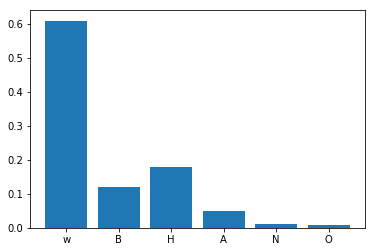

In [349]:
plt.bar(range(len(Ethn_dict)), list(Ethn_dict.values()), align='center')
plt.xticks(range(len(Ethn_dict)), list(Ethn_dict.keys()))

In [350]:
cat_df = df4.select_dtypes(include=['object'])
cat_df.shape[1]

5

In [351]:
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [352]:
cat_df = df4.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df4, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(3644, 16)


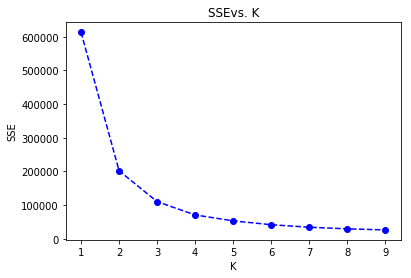

In [353]:
def get_kmeans_score(data, center):
    kmeans=KMeans(n_clusters=center)
    model = kmeans.fit(df_new)
    score = np.abs(model.score(df_new))
    return score

scores = []
centers = list(range(1,10))

for center in centers:
    scores.append(get_kmeans_score(df_new, center))
    
plt.plot(centers, scores, linestyle = '--', marker = 'o', color = 'b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSEvs. K');

In [354]:
kmeans = KMeans(4)
model = kmeans.fit(df_new)
labels = model.predict(df_new)


In [355]:
h.plot_data(df_new, labels)

NameError: name 'h' is not defined

In [356]:
df_new1 = df_new[labels == 1]

In [357]:
df_new1.describe()

,age,year,armed_unarmed,gender_M,race_B,race_H,race_N,race_O,race_W,threat_level_attack,threat_level_other,flee_Foot,flee_Not fleeing,flee_Other
count,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000,826.000000
mean,45.444310,2016.713075,0.055690,0.950363,0.179177,0.163438,0.012107,0.009685,0.618644,0.657385,0.309927,0.098063,0.743341,0.027845
std,3.678922,1.330755,0.229461,0.217325,0.383733,0.369989,0.109428,0.097995,0.486014,0.474872,0.462744,0.297580,0.437054,0.164628
min,40.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,52.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_new1 = df_new[labels == 3]

In [ ]:
df_new1.describe()

In [ ]:
df_new_no_state = df_new

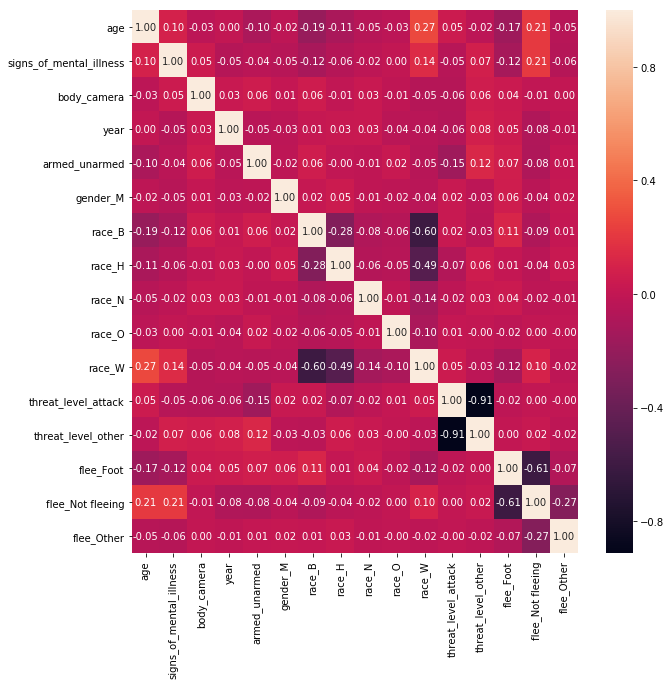

In [359]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f');

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

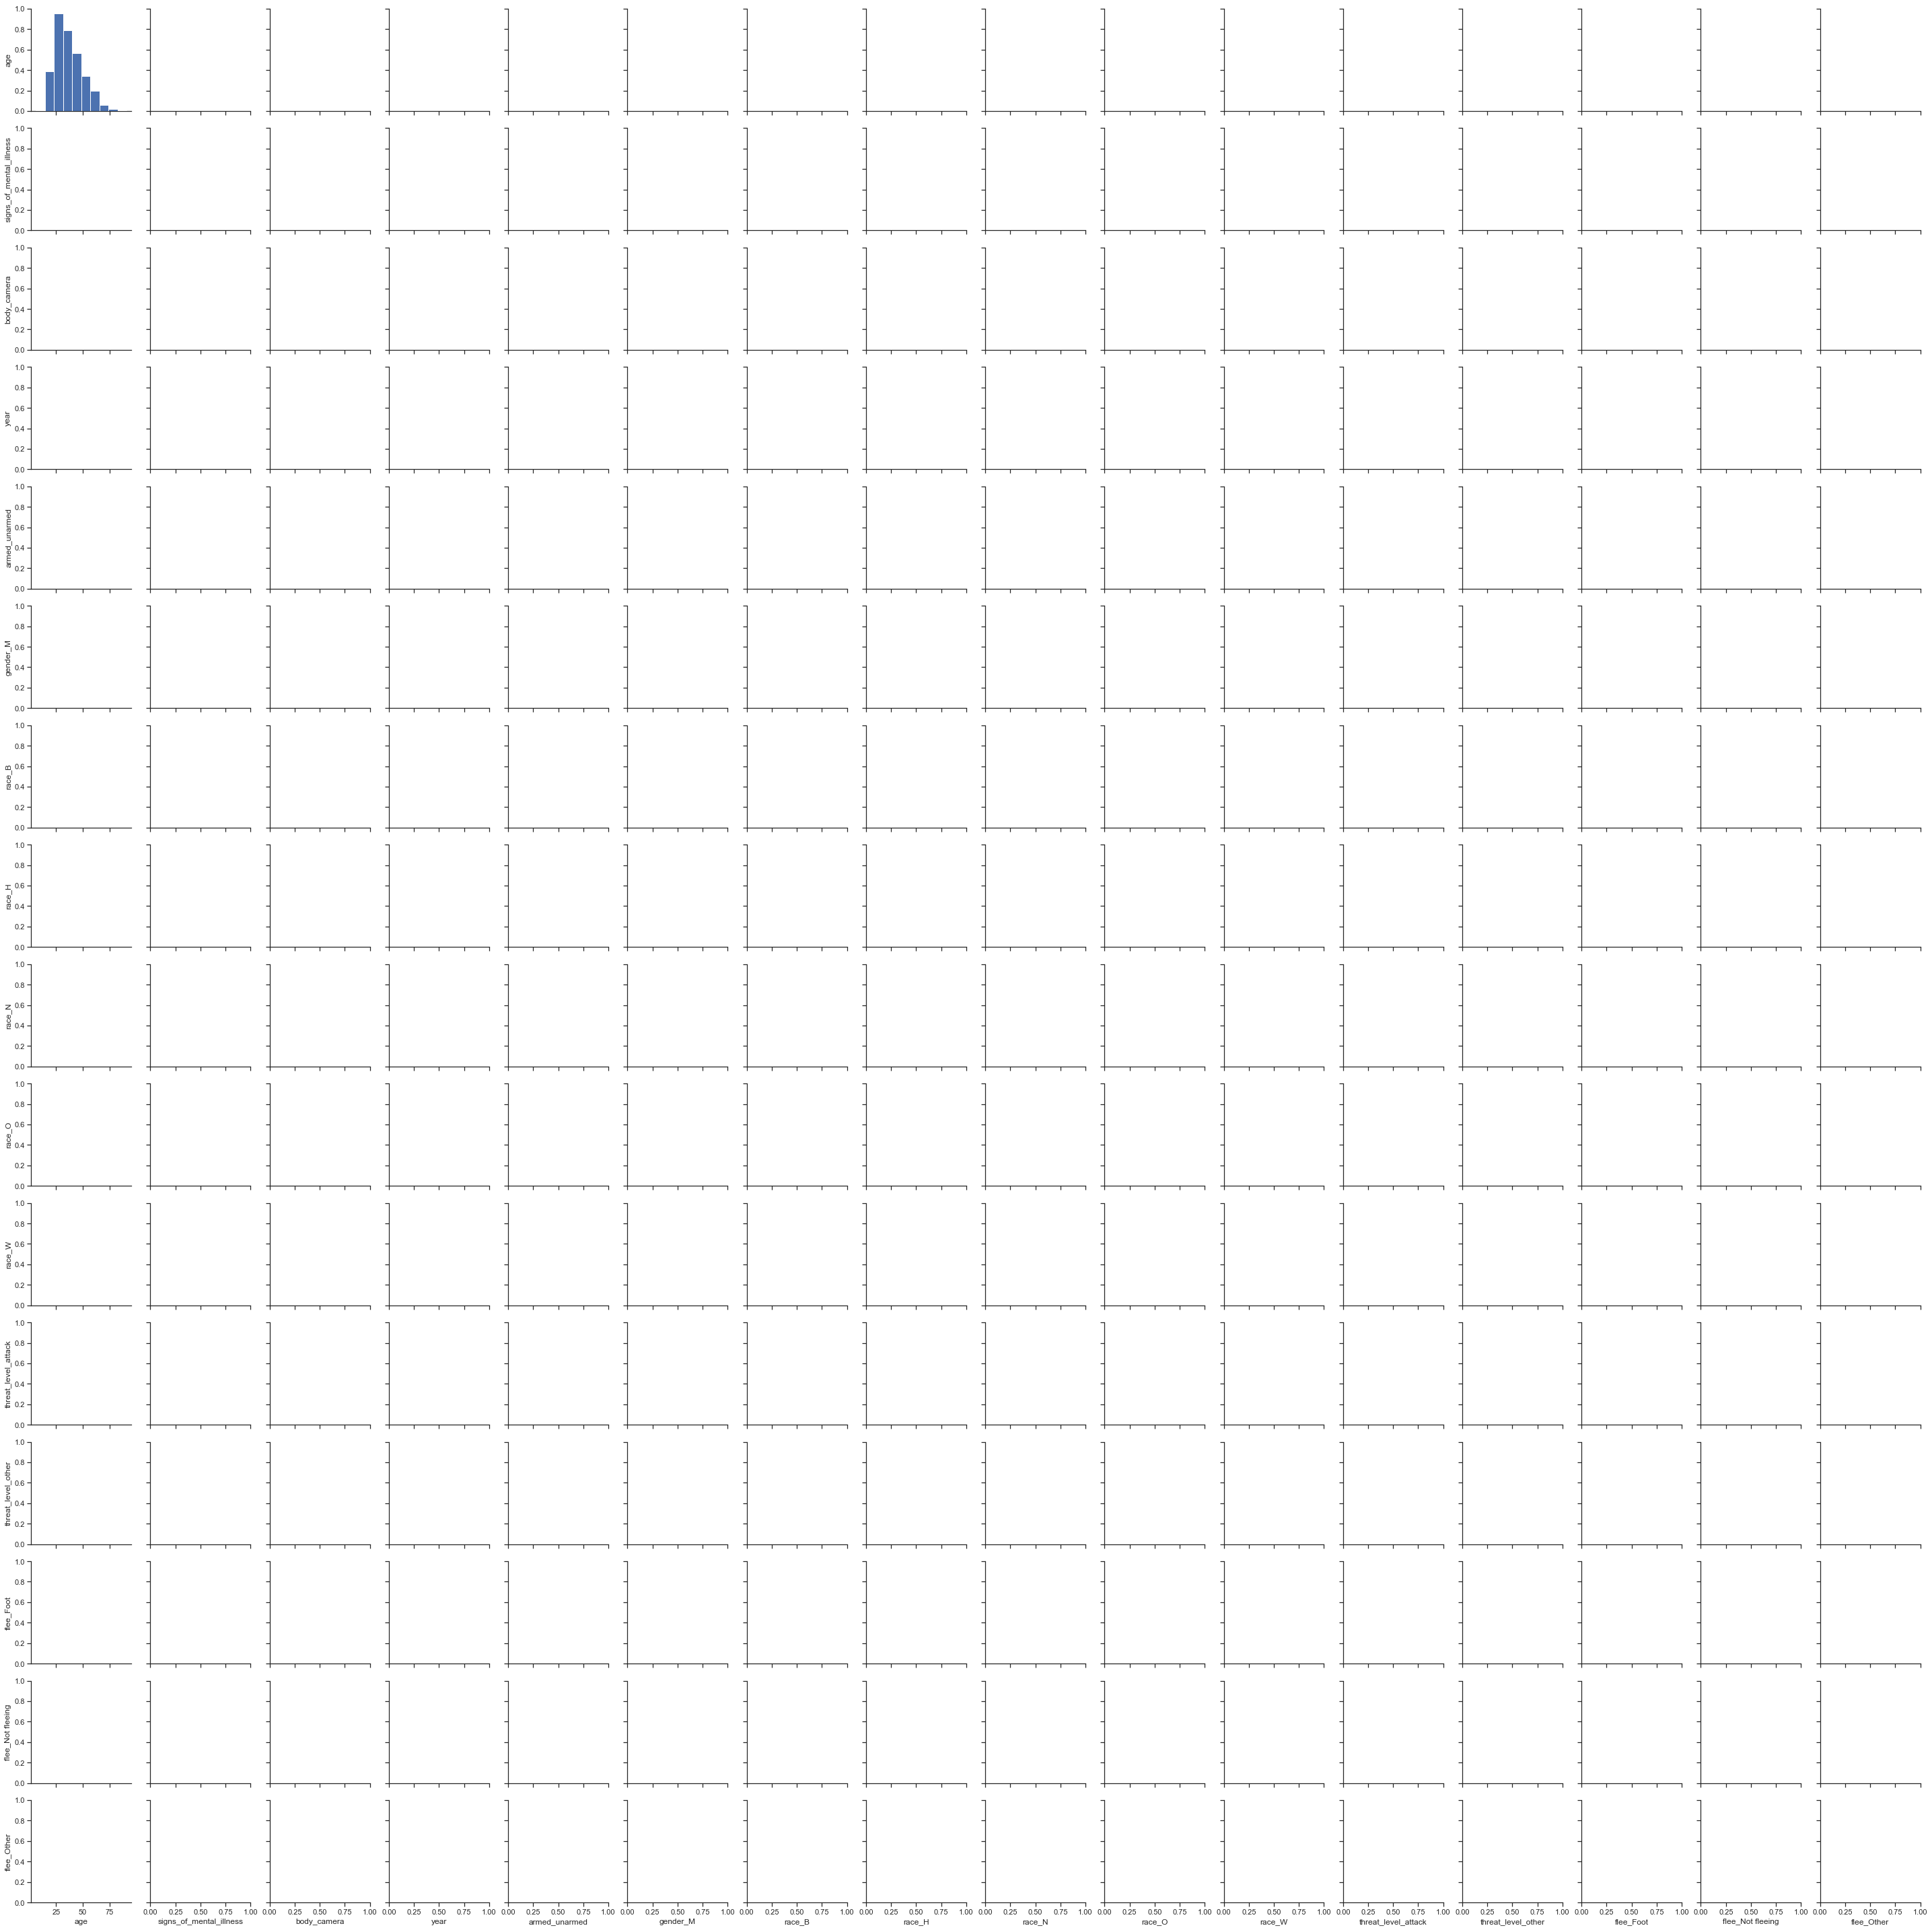

In [362]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

g = sns.pairplot(df_new)